# Binary Classification of Categorical data

<b> Task 2 - Binary Classification Problem </b>

Given the training and validation datasets, <a href="http://bit.ly/widebot-new-binclf-data"> Download here</a>  , Create and train a machine learning model using the training set that performs well on the validation set. You should decide on the metrics of "performance" yourself, We will assess your decision.


<h2 style="color:#8b0000 ">Gathering Data </h2>

In [190]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler


In [191]:
# Converting from TSV to CSV using sep= ;
#Fixing decimal point from , to . 
#CODE
training= pd.read_csv("training.csv", sep=";", decimal=",")
validation= pd.read_csv("validation.csv", sep=";", decimal=",")
#TEST
training.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [192]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
variable1     3661 non-null object
variable2     3661 non-null float64
variable3     3700 non-null float64
variable4     3636 non-null object
variable5     3636 non-null object
variable6     3634 non-null object
variable7     3634 non-null object
variable8     3700 non-null float64
variable9     3700 non-null object
variable10    3700 non-null object
variable11    3700 non-null int64
variable12    3700 non-null object
variable13    3700 non-null object
variable14    3600 non-null float64
variable15    3700 non-null int64
variable17    3600 non-null float64
variable18    1555 non-null object
variable19    3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(5), int64(3), object(11)
memory usage: 549.3+ KB


In [193]:
training.describe()

,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19
count,3661.000000,3700.000000,3700.000000,3700.000000,3600.000000,3700.000000,3.600000e+03,3700.000000
mean,32.820713,0.000585,3.439496,4.160000,162.695000,2246.705946,1.626950e+06,0.925405
std,12.666181,0.000540,4.335229,6.750553,156.045682,8708.571126,1.560457e+06,0.262772
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,23.000000,0.000150,0.500000,0.000000,0.000000,0.000000,0.000000e+00,1.000000
50%,28.670000,0.000425,1.750000,2.000000,120.000000,113.000000,1.200000e+06,1.000000
75%,40.830000,0.000963,5.000000,6.000000,280.000000,1059.750000,2.800000e+06,1.000000
max,80.250000,0.002800,28.500000,67.000000,1160.000000,100000.000000,1.160000e+07,1.000000


# Assessing and Cleaning data

<h2 style="color:#8b0000 ">Performance Metrics: </h2>
 <ul> 
<li> Confusion Matrix </li>
<li>Classification Accuracy</li>
<li>Classification Report
<ul> <li> Precision </li>
<li>Recall </li>
<li>Specificity</li>
    <li>F1 Score </li> </ul>
<li>AUC (Area Under ROC curve) </ul>

In [194]:
# New dataframe to gather training and validation data 
#CODE
frames = [training, validation]
all_data = pd.concat(frames)
#TEST
all_data.shape[0]==training.shape[0]+validation.shape[0]

True

<h3> Null values Problem </h3>

In [195]:
#Checking NULL values in columns 
all_data.isnull().sum()

variable1       42
variable2       42
variable3        0
variable4       66
variable5       66
variable6       69
variable7       69
variable8        0
variable9        0
variable10       0
variable11       0
variable12       0
variable13       0
variable14     103
variable15       0
variable17     103
variable18    2256
variable19       0
classLabel       0
dtype: int64

In [196]:
#Drop variable18 column as it has many null values (2145 from 3700)
#CODE
all_data = all_data.drop(['variable18'], 1)
# TEST 
list(all_data)

['variable1',
 'variable2',
 'variable3',
 'variable4',
 'variable5',
 'variable6',
 'variable7',
 'variable8',
 'variable9',
 'variable10',
 'variable11',
 'variable12',
 'variable13',
 'variable14',
 'variable15',
 'variable17',
 'variable19',
 'classLabel']

In [197]:
#dtypes: float64(5), int64(3), object(11)
#Replace all numeric columns' nulls with the median 
#CODE
for i in all_data.columns:
    if all_data[i].dtypes == 'O':
        all_data[i] = all_data[i].fillna(all_data[i].mode()[0])
    else:
        all_data[i]=all_data[i].fillna(all_data[i].median())
#TEST
all_data.isnull().sum() 

variable1     0
variable2     0
variable3     0
variable4     0
variable5     0
variable6     0
variable7     0
variable8     0
variable9     0
variable10    0
variable11    0
variable12    0
variable13    0
variable14    0
variable15    0
variable17    0
variable19    0
classLabel    0
dtype: int64

<b> I tried to use Over-sampling to solve imbalanced data problem which involves adding more examples from the minority class, but I found that using class weight is much better:  </b>
- Class weights directly modify the loss function by giving more (or less) penalty to the classes with more (or less) weight.
- Oversampling method essentially gives more weight to particular classes as well (duplicating observations duplicates the penalty for those particular observations.

<h3> Convert categorical variable</h3>

In [198]:
#Convert categorical variable into dummy/indicator variables that has two specific values, 1 or 0.
#Code
X = pd.get_dummies(all_data)
#Test
X.head()

,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19,variable1_a,variable1_b,...,variable9_t,variable10_f,variable10_t,variable12_f,variable12_t,variable13_g,variable13_p,variable13_s,classLabel_no.,classLabel_yes.
0,17.92,0.000054,1.750,1,80.0,5,800000.0,0,1,0,...,0,0,1,0,1,1,0,0,1,0
1,16.92,0.000034,0.290,0,200.0,0,2000000.0,0,0,1,...,0,1,0,1,0,0,0,1,1,0
2,31.25,0.000112,0.000,1,96.0,19,960000.0,0,0,1,...,0,0,1,1,0,1,0,0,1,0
3,48.17,0.000133,0.335,0,0.0,120,0.0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
4,32.33,0.000350,0.500,0,232.0,0,2320000.0,0,0,1,...,0,1,0,0,1,1,0,0,1,0


In [199]:
#Creating Training and testing set
#CODE
train_len= training.shape[0]
x= X.drop('classLabel_yes.',axis = 1)

X_train = x[ :train_len]
X_test = x[train_len: ]
y_train = X['classLabel_yes.'][ :train_len]
y_test = X['classLabel_yes.'][train_len: ]
#TEST
X_train.shape[0]+X_test.shape[0]==all_data.shape[0]

True

In [200]:
#Making all dtypes: float 
#CODE
X = X.astype(float)
#TEST
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 0 to 199
Data columns (total 50 columns):
variable2          3900 non-null float64
variable3          3900 non-null float64
variable8          3900 non-null float64
variable11         3900 non-null float64
variable14         3900 non-null float64
variable15         3900 non-null float64
variable17         3900 non-null float64
variable19         3900 non-null float64
variable1_a        3900 non-null float64
variable1_b        3900 non-null float64
variable4_l        3900 non-null float64
variable4_u        3900 non-null float64
variable4_y        3900 non-null float64
variable5_g        3900 non-null float64
variable5_gg       3900 non-null float64
variable5_p        3900 non-null float64
variable6_W        3900 non-null float64
variable6_aa       3900 non-null float64
variable6_c        3900 non-null float64
variable6_cc       3900 non-null float64
variable6_d        3900 non-null float64
variable6_e        3900 non-null 

In [201]:
#Scaling the data to unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Choosing Classifiers

In [202]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


<h2 style="color:#8b0000 "> 1- SGD Classifier </h2>

In [203]:
from sklearn.feature_extraction.text import CountVectorizer
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
y_pred = cross_val_predict(sgd_clf, X_train, y_train)


print("SGD confusion matrix: ")

print(confusion_matrix(y_train, y_pred))

print("The accuracy of SGD Classifier is : {}".format(sgd_clf.score(X_test, y_test)))


SGD confusion matrix: 
[[ 269    7]
 [   0 3424]]
The accuracy of SGD Classifier is : 0.73


C:\Users\zas47\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<h2 style="color:#8b0000 ">2- BernoulliNB Classifier </h2>

In [204]:
#Import Bernoulli NB Classifier and get the predicted data
NB_clf = BernoulliNB()
NB_clf.fit(X_train,y_train)
y_pred=NB_clf.predict(X_test)

print(classification_report_imbalanced(y_test, y_pred))
print("The accuracy of Bernoulli Classifier is : {} %".format(accuracy_score(y_test, y_pred)*100))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.91      0.99      0.95      0.95      0.89       107
          1       0.90      0.99      0.91      0.94      0.95      0.90        93

avg / total       0.95      0.94      0.95      0.95      0.95      0.90       200

The accuracy of Bernoulli Classifier is : 94.5 %


<h2 style="color:#8b0000 ">3- RandomForest Classifier (Best) </h2>

<h3> Setting class weight to avoid manage imbalanced data </h3> 

In [205]:
#unique_classes = list(all_data['classLabel_yes.'].unique())
classes_num=[0,1] #classLabel_yes has only 1 and 0 
class_weight = {}
for observation in classes_num:
    class_weight[observation] = all_data.shape[0]/((all_data.loc[X['classLabel_yes.'] == observation].shape[0])*len(classes_num))
class_weight

{0: 5.091383812010444, 1: 0.554449815183395}

In [206]:
#Import Bernoulli NB Classifier and get the predicted data

RF_clf=RandomForestClassifier(n_estimators=1000, class_weight=class_weight,random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
RF_clf.fit(X_train,y_train)
y_pred=RF_clf.predict(X_test)

print(classification_report_imbalanced(y_test, y_pred))
print("The accuracy of RandomForest Classifier is : {} %".format(accuracy_score(y_test, y_pred)*100))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.93      0.99      0.96      0.96      0.92       107
          1       0.93      0.99      0.93      0.96      0.96      0.93        93

avg / total       0.96      0.96      0.96      0.96      0.96      0.92       200

The accuracy of RandomForest Classifier is : 96.0 %


<h3> AUC ROC Curve </h3> 

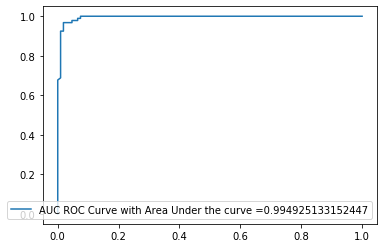

In [207]:
y_pred_proba = RF_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.legend(loc=4)
plt.show()

#####################################################################################################
##################################<b> Created by: Ahmed Elsayed Lila </b>#######################################
#####################################################################################################
